 # Import required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Loading Dataset

In [2]:
df = pd.read_csv('Restaurent.csv')



In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Basic Data Cleaning

In [5]:
# Drop rows without location information
df = df.dropna(subset=["Latitude", "Longitude", "City"])

# Fill other missing values if any
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


# Visualizing Restaurant Distribution

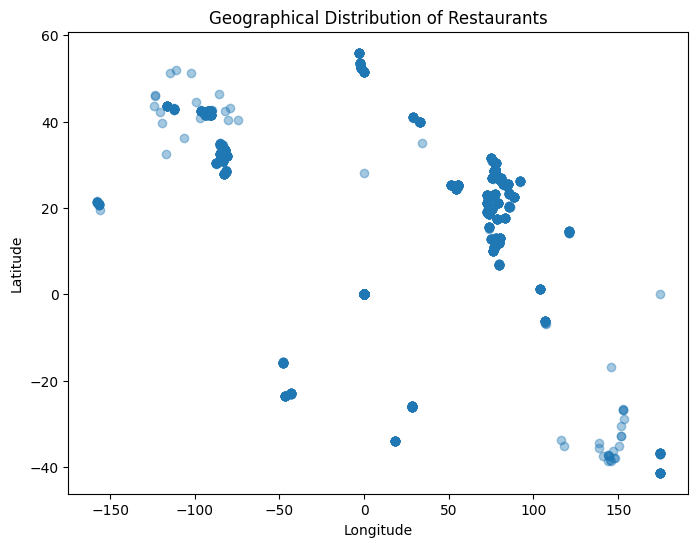

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df["Longitude"], df["Latitude"], alpha=0.4)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Restaurants")
plt.show()


# Restaurant count by city

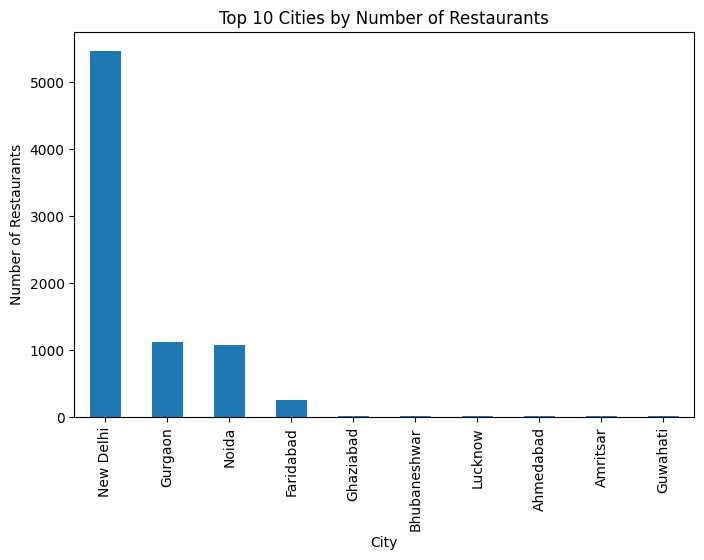

In [8]:
city_counts = df["City"].value_counts().head(10)

plt.figure(figsize=(8,5))
city_counts.plot(kind='bar')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()

# Group-based Statistical Analysis
## Average rating by city

In [9]:
avg_rating_city = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)
avg_rating_city.head(10)


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64

## Average price range by city

In [11]:
avg_price_city = df.groupby("City")["Price range"].mean().sort_values(ascending=False)
avg_price_city.head(10)


City
Panchkula           4.000000
Vineland Station    4.000000
Paynesville         4.000000
Johannesburg        4.000000
Inner City          4.000000
Pasay City          4.000000
Princeton           4.000000
Sandton             3.818182
Mandaluyong City    3.750000
Pretoria            3.700000
Name: Price range, dtype: float64

## Most common cuisines by city

In [12]:
top_cuisines_city = df.groupby("City")["Cuisines"].agg(lambda x: x.value_counts().index[0])
top_cuisines_city.head(10)


City
Abu Dhabi                                             American
Agra                                     North Indian, Mughlai
Ahmedabad    Chinese, Italian, North Indian, Mexican, Medit...
Albany                                            North Indian
Allahabad                                North Indian, Chinese
Amritsar                                          North Indian
Ankara                                    Kebab, Turkish Pizza
Armidale                                       Bar Food, Steak
Athens                                American, Italian, Pizza
Auckland                                              Desserts
Name: Cuisines, dtype: object

## Locality-Level Analysis

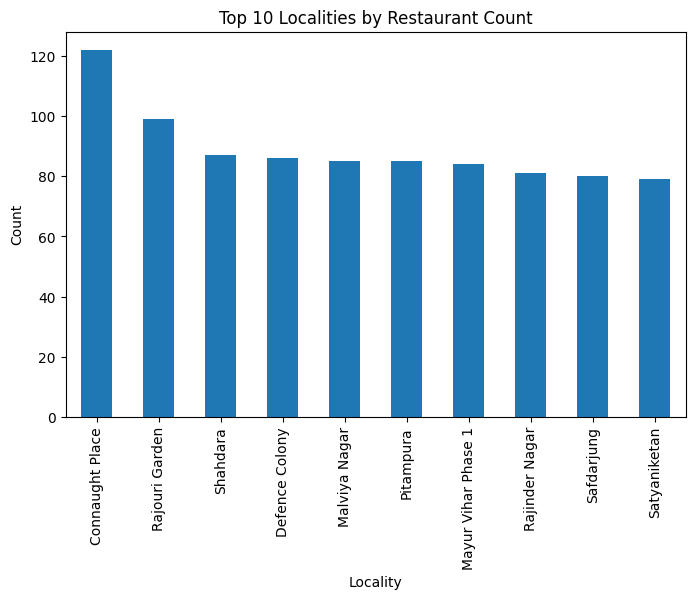

In [14]:
if "Locality" in df.columns:
    locality_counts = df["Locality"].value_counts().head(10)
    
    plt.figure(figsize=(8,5))
    locality_counts.plot(kind="bar")
    plt.title("Top 10 Localities by Restaurant Count")
    plt.xlabel("Locality")
    plt.ylabel("Count")
    plt.show()


In [ ]:
##